In [20]:
print("GRACE")

GRACE


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [22]:
df_train=pd.read_csv('training_data.csv')
df_train.head()

,Unnamed: 0,Timestamp,\\DESKTOP-FUOCR3U\Processor(_Total)\% Processor Time,\\DESKTOP-FUOCR3U\Processor(_Total)\% Idle Time,\\DESKTOP-FUOCR3U\Memory\Available MBytes,\\DESKTOP-FUOCR3U\LogicalDisk(_Total)\% Disk Time
0,0,2023-04-28 05:59:48.490,13.959073,52.460838,6768,1.661641
1,1,2023-04-28 06:03:48.490,2.257027,72.309335,6830,0.121271
2,2,2023-04-28 06:07:48.490,4.805736,50.994980,6676,0.412856
3,3,2023-04-28 06:11:48.490,22.811708,40.117944,4861,2.065038
4,4,2023-04-28 06:15:48.490,8.991300,54.365496,4775,0.318020


In [23]:
df_test=pd.read_csv('test_data.csv')
df_test.head()

,Unnamed: 0,Timestamp,\\DESKTOP-FUOCR3U\Processor(_Total)\% Processor Time,\\DESKTOP-FUOCR3U\Processor(_Total)\% Idle Time,\\DESKTOP-FUOCR3U\Memory\Available MBytes,\\DESKTOP-FUOCR3U\LogicalDisk(_Total)\% Disk Time
0,0,2023-05-23 00:03:48.490,4.854721,92.278778,8882,0.026877
1,1,2023-05-23 00:07:48.490,4.768544,92.328257,8884,0.020212
2,2,2023-05-23 00:11:48.490,4.684857,92.434268,8885,0.019495
3,3,2023-05-23 00:15:48.490,4.695365,92.376336,8885,0.024519
4,4,2023-05-23 00:19:48.490,4.783663,92.327780,8873,0.029278


In [24]:
df_train.isnull().sum()

Unnamed: 0                                              0
Timestamp                                               0
\\DESKTOP-FUOCR3U\Processor(_Total)\% Processor Time    0
\\DESKTOP-FUOCR3U\Processor(_Total)\% Idle Time         0
\\DESKTOP-FUOCR3U\Memory\Available MBytes               0
\\DESKTOP-FUOCR3U\LogicalDisk(_Total)\% Disk Time       0
dtype: int64

In [25]:
df_train.columns[1]

'Timestamp'

In [26]:
df_train = df_train.rename(columns={df_train.columns[2]: 'Processor Time'})
df_train = df_train.rename(columns={df_train.columns[3]: 'Idle Time'})
df_train = df_train.rename(columns={df_train.columns[4]: 'Available'})
df_train = df_train.rename(columns={df_train.columns[5]: 'Disk Time'})


In [28]:
df_test = df_test.rename(columns={df_test.columns[2]: 'Processor Time'})
df_test = df_test.rename(columns={df_test.columns[3]: 'Idle Time'})
df_test = df_test.rename(columns={df_test.columns[4]: 'Available'})
df_test = df_test.rename(columns={df_test.columns[5]: 'Disk Time'})

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8911 entries, 0 to 8910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8911 non-null   int64  
 1   Timestamp       8911 non-null   object 
 2   Processor Time  8911 non-null   float64
 3   Idle Time       8911 non-null   float64
 4   Available       8911 non-null   int64  
 5   Disk Time       8911 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 417.8+ KB


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2608 non-null   int64  
 1   Timestamp       2608 non-null   object 
 2   Processor Time  2608 non-null   float64
 3   Idle Time       2608 non-null   float64
 4   Available       2608 non-null   int64  
 5   Disk Time       2608 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 122.4+ KB


In [32]:
df_train.isnull().sum()

Unnamed: 0        0
Timestamp         0
Processor Time    0
Idle Time         0
Available         0
Disk Time         0
dtype: int64

In [33]:
df_train['Timestamp']=pd.to_datetime(df_train['Timestamp'])
df_test['Timestamp']=pd.to_datetime(df_test['Timestamp'])

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8911 entries, 0 to 8910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      8911 non-null   int64         
 1   Timestamp       8911 non-null   datetime64[ns]
 2   Processor Time  8911 non-null   float64       
 3   Idle Time       8911 non-null   float64       
 4   Available       8911 non-null   int64         
 5   Disk Time       8911 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 417.8 KB


In [35]:
df_train.head()

,Unnamed: 0,Timestamp,Processor Time,Idle Time,Available,Disk Time
0,0,2023-04-28 05:59:48.490,13.959073,52.460838,6768,1.661641
1,1,2023-04-28 06:03:48.490,2.257027,72.309335,6830,0.121271
2,2,2023-04-28 06:07:48.490,4.805736,50.994980,6676,0.412856
3,3,2023-04-28 06:11:48.490,22.811708,40.117944,4861,2.065038
4,4,2023-04-28 06:15:48.490,8.991300,54.365496,4775,0.318020


In [36]:
df_train.set_index('Timestamp',inplace=True)

<AxesSubplot:xlabel='Timestamp'>

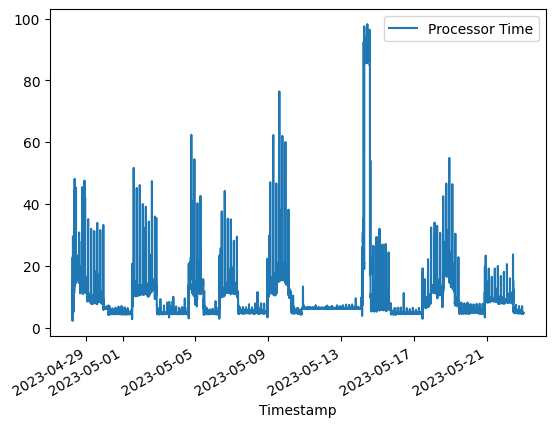

In [37]:
df_train[['Processor Time']].plot()

<AxesSubplot:xlabel='Timestamp'>

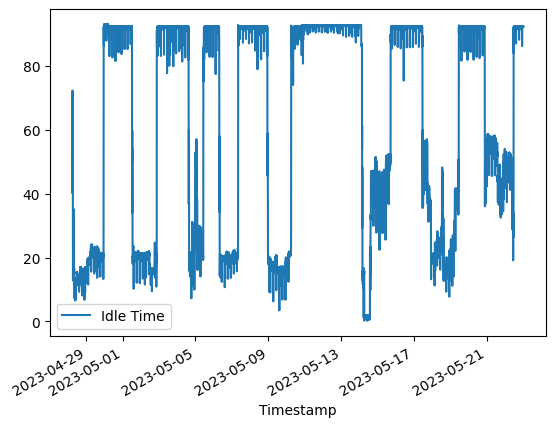

In [38]:
df_train[['Idle Time']].plot()

In [39]:
df1=df_train.reset_index()['Idle Time']

In [41]:
df1

0       52.460838
1       72.309335
2       50.994980
3       40.117944
4       54.365496
          ...    
8906    92.355495
8907    92.338494
8908    92.391400
8909    92.438411
8910    92.364885
Name: Idle Time, Length: 8911, dtype: float64

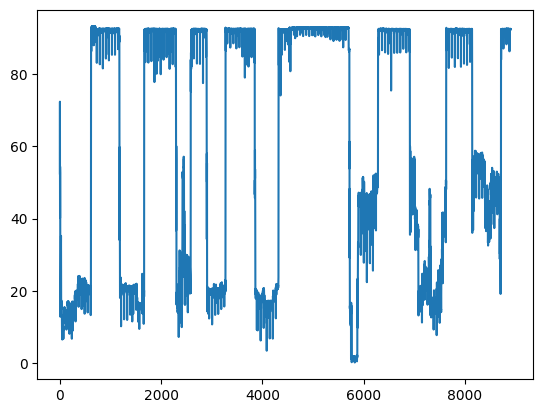

In [43]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [44]:
### LSTM Are sensitive to the scale of the data.
## Apply Min max Scaler to the Transformation

In [45]:
import numpy as np


In [46]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
df1.shape
df1

array([[0.56254909],
       [0.77609041],
       [0.54677857],
       ...,
       [0.99214458],
       [0.99265035],
       [0.99185932]])

In [48]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [49]:
training_size,test_size

(5792, 3119)

In [50]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [51]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [52]:
print(X_train.shape), print(y_train.shape)


(5691, 100)
(5691,)


(None, None)

In [53]:
print(X_test.shape), print(ytest.shape)


(3018, 100)
(3018,)


(None, None)

In [54]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [55]:
print(X_train)

[[[0.56254909]
  [0.77609041]
  [0.54677857]
  ...
  [0.13670144]
  [0.14750167]
  [0.14784785]]

 [[0.77609041]
  [0.54677857]
  [0.42975729]
  ...
  [0.14750167]
  [0.14784785]
  [0.1412385 ]]

 [[0.54677857]
  [0.42975729]
  [0.58304048]
  ...
  [0.14784785]
  [0.1412385 ]
  [0.13577797]]

 ...

 [[0.99695102]
  [0.99634556]
  [0.996198  ]
  ...
  [0.01296128]
  [0.00961057]
  [0.01369732]]

 [[0.99634556]
  [0.996198  ]
  [0.99725045]
  ...
  [0.00961057]
  [0.01369732]
  [0.0135288 ]]

 [[0.996198  ]
  [0.99725045]
  [0.99699413]
  ...
  [0.01369732]
  [0.0135288 ]
  [0.01172907]]]


In [56]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
89/89 [==============================] - 35s 298ms/step - loss: 0.0399 - val_loss: 0.0048
Epoch 2/100
44/89 [=============>................] - ETA: 12s - loss: 0.0063

In [ ]:
import tensorflow as tf



In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()